### ref: <https://miruetoto.github.io/yechan3/posts/3_Researches/PINKOCTO/2023-06-28-%EC%BB%A4%EB%84%90%EB%A6%AC%EA%B7%B8%EB%A0%88%EC%85%98.html>

선형 모델에서는 다항식이나 삼각다항식 등 기저 함수를 훈련 표본 $\{(x_i, y_i)\}_{i=1}^n$과 관계없이 결정해왔다. 이와 달리 커널모델은 기저함수의 설계에 입력 표본 $\{x_i\}_{i=1}^n$을 이용한다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(0,1,5)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [5]:
y = x*2 + np.random.randn(5) * 0.3
y

array([-0.15543881,  0.55747067,  0.88547158,  1.18334317,  2.09097526])

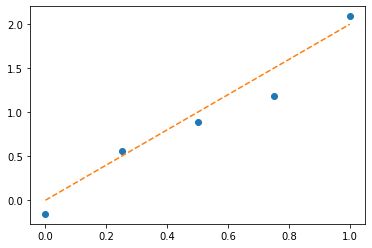

In [6]:
plt.plot(x,y,'o')
plt.plot(x,2*x,'--')

`-` 가우스 커널(Gaussian kernel)

$$K(\boldsymbol{x},\boldsymbol{c})=\exp\left(-\frac{||\boldsymbol{x}-\boldsymbol{c}||^2}{2h^2}\right)$$

가우스 커널 모델은 각 입력 표본 $\{x_i\}_{i=1}^n$에 가우스 커널을 배치하고, 각각의 높이 $\{\theta_i\}_{i=1}^n$을 파라미터로 학습한다.

커널 모델의 파라미터 수는 입력변수 $\boldsymbol{x}$의 차원 $d$에 의존하지 않으며, 훈련 표본 수 $n$만으로 결정된다. 매우 많은 훈련 표본을 다루는 경우에도 입력 표본 $\{\boldsymbol{x}_i\}_{i=1}^n$의 (이를테면 무작위로 선택한) 부분집합 $\{\boldsymbol{c}\}_{j=1}^b$만의 커널 중심으로 사용하여 계산 부하를 줄일 수 있다.

$$f_{\boldsymbol{\theta}}(\boldsymbol{x}) = \sum_{i=1}^b \theta_j K(\boldsymbol{x}, \boldsymbol{c}_j)$$

---

$$y_i= \sum_{i=1}^{5}\theta_i\exp\left(-\frac{|x-x_i|^2}{2h^2}\right)$$

In [8]:
h= 0.15
x0 = lambda xstar: np.exp(-(xstar-x[0])**2 / 2 / (h**2))
x1 = lambda xstar: np.exp(-(xstar-x[1])**2 / 2 / (h**2))
x2 = lambda xstar: np.exp(-(xstar-x[2])**2 / 2 / (h**2))
x3 = lambda xstar: np.exp(-(xstar-x[3])**2 / 2 / (h**2))
x4 = lambda xstar: np.exp(-(xstar-x[4])**2 / 2 / (h**2))

In [9]:
θ0 = 0
θ1 = 0.2
θ2 = 0.5
θ3 = 1.0
θ4 = 1.5

In [10]:
xstar = 0.6 

In [11]:
θ0*x0(0.6)+θ1*x1(0.6)+θ2*x2(0.6)+θ3*x3(0.6)+θ4*x4(0.6)

1.062893318071169

In [12]:
_yhat = lambda xstar : θ0*x0(xstar)+\
θ1*x1(xstar)+\
θ2*x2(xstar)+\
θ3*x3(xstar)+\
θ4*x4(xstar)

In [13]:
(_yhat(0)-y[0])**2

0.04295088087502215

In [18]:
y

array([-0.15543881,  0.55747067,  0.88547158,  1.18334317,  2.09097526])

In [21]:
_yhat(0), _yhat(0.25), _yhat(0.5), _yhat(0.75)

(0.05180712881341244,
 0.32854761450787906,
 0.8050215307419648,
 1.499477601582487)

In [14]:
loss = (_yhat(0)-y[0])**2 + (_yhat(0.25)-y[1])**2+ \
(_yhat(0.5)-y[2])**2+(_yhat(0.75)-y[3])**2+\
(_yhat(1)-y[4])**2

$loss(\theta_0, \theta_1, \theta_3, \theta_4)$를 최소화 하는 $\boldsymbol{\theta}$?

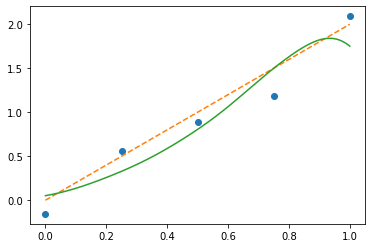

In [25]:
_x = np.linspace(0,1,1000)
plt.plot(x,y,'o')
plt.plot(x,2*x,'--')
plt.plot(_x,_yhat(_x))

ref2: <https://towardsdatascience.com/kernel-regression-from-scratch-in-python-ea0615b23918>

ref3: <https://www.kaggle.com/code/kunjmehta/gaussian-kernel-regression-from-scratch>

### What is kernel Regression?

Seeing the name, you may ask that if ‘linear’ in linear regression meant a linear function and ‘polynomial’ in polynomial regression meant a polynomial function, what does ‘kernel’ mean? Turns out, it means a kernel function! So, what is a kernel function? Simply, it is a similarity function that takes two inputs and spits out how similar they are. We will see shortly how a kernel function is used in kernel regression.

Now about kernel regression. Unlike linear and polynomial regression in which the optimal parameter vector $c=[c₁, c₂, …, cₙ]$ needs to be learnt, kernel regression is non-parametric, meaning that it calculates the target $yₜ$ by performing computations directly on the input $xₜ$.

In [26]:
from scipy.stats import norm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/math.sqrt(2*math.pi))*math.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels]
        return np.dot(weights, self.y)/len(self.x)

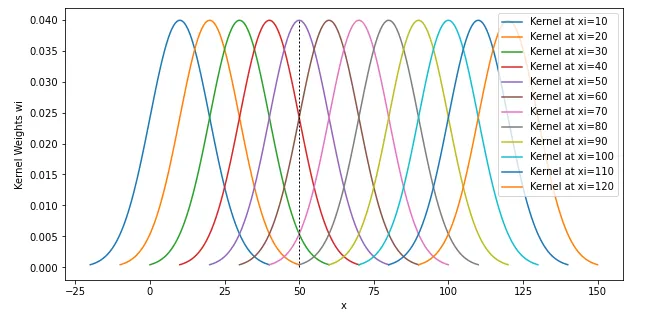!

In [27]:
gkr = GKR([10,20,30,40,50,60,70,80,90,100,110,120], [2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932], 10)
gkr.predict(50)

1995.2858171576065

In [28]:
from scipy.stats import multivariate_normal

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)

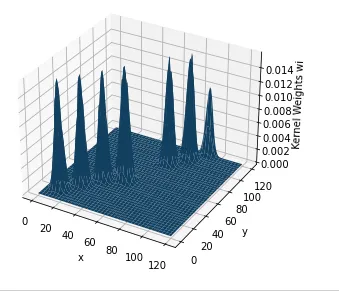

In [29]:
gkr = GKR([[11,15],[22,30],[33,45],[44,60],[50,52],[67,92],[78,107],[89,123],[100,137]], [2337,2750,2301,2500,1700,1100,1000,1642, 1932], 10)
gkr.predict([20,40])

2563.086167381936